In [1]:
# --- Import libraries ---
import kagglehub                     # Used to download datasets directly from Kaggle
import pandas as pd                  # For data handling and analysis (DataFrames)
import numpy as np                   # For numerical operations and array manipulations
import matplotlib.pyplot as plt      # For data visualization (graphs and charts)
from sklearn.model_selection import train_test_split   # To split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data scaling and label encoding
from sklearn.linear_model import LogisticRegression    # Logistic Regression model for classification
from sklearn.metrics import (                          # Metrics to evaluate model performance
    accuracy_score,               # To calculate accuracy of the model
    confusion_matrix,             # To create a confusion matrix
    ConfusionMatrixDisplay,       # To display the confusion matrix visually
    classification_report         # To generate precision, recall, and F1-score report
)

In [2]:
# --- Step 2: Download and load Kaggle dataset safely ---
import os
import kagglehub

path = kagglehub.dataset_download("heptapod/titanic")
print("✅ Dataset downloaded to:", path)

# List files to see exact names
print("\nFiles inside dataset folder:")
print(os.listdir(path))

# --- Step 3: Load the CSV file automatically ---
# Find the first CSV file in that folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

# Load dataset
df = pd.read_csv(csv_path)
print("\n✅ Loaded file:", csv_path)
display(df.head())

Using Colab cache for faster access to the 'titanic' dataset.
✅ Dataset downloaded to: /kaggle/input/titanic

Files inside dataset folder:
['train_and_test2.csv']

✅ Loaded file: /kaggle/input/titanic/train_and_test2.csv


Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0  
1        0        0         1  
2        0        0         1  
3        0        0         1  
4        0        0         0  

[5 rows x 28 columns]

In [3]:
print(df.columns.tolist())

['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived']


In [4]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.columns.tolist())

['passengerid', 'age', 'fare', 'sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'pclass', 'zero.15', 'zero.16', 'embarked', 'zero.17', 'zero.18', '2urvived']


In [5]:
df = df.rename(columns={'2urvived': 'survived'})

In [6]:
# --- Step 4: Data Preprocessing ---
# Select useful columns
df = df[['passengerid', 'sibsp', 'sex', 'age', 'fare', 'survived']]

In [7]:
# --- Step 4: Handle Missing Values ---
df = df.dropna(subset=['age', 'fare', 'sex', 'survived'])
print("After removing missing values:", df.shape)

After removing missing values: (1309, 6)


In [8]:
# --- Step 5: Encode Categorical Feature ---
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # male=1, female=0 (usually)

In [9]:
# --- Step 6: Define Features (X) and Target (y) ---
X = df[['age', 'fare', 'sex', 'sibsp']]
y = df['survived']

In [10]:
# --- Step 7: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# --- Step 8: Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# --- Step 9: Train Logistic Regression Model ---
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# --- Step 10: Make Predictions ---
y_pred = model.predict(X_test)

In [14]:
# --- Step 11: Evaluate the Model ---
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7862595419847328

Confusion Matrix:
 [[178  11]
 [ 45  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       189
           1       0.72      0.38      0.50        73

    accuracy                           0.79       262
   macro avg       0.76      0.66      0.68       262
weighted avg       0.78      0.79      0.76       262



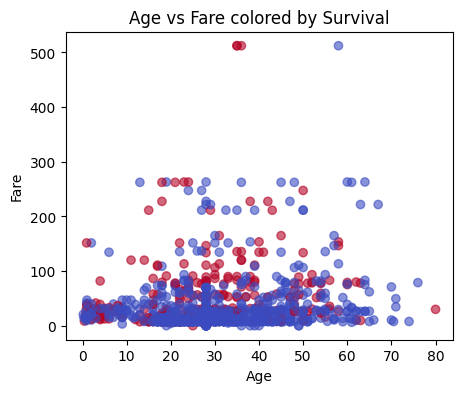

In [15]:
# --- Step 12: Visualization (optional) ---
plt.figure(figsize=(5, 4))
plt.scatter(df['age'], df['fare'], c=df['survived'], cmap='coolwarm', alpha=0.6)
plt.title("Age vs Fare colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()